In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pickle
import numpy as np
import cirq
import matplotlib.pyplot as plt
from qaoa_with_cat_qubits.circ import Circ
from qaoa_with_cat_qubits.plotlib import *
import qutip as qt
import scipy as sp
from qaoa_with_cat_qubits.ptm import compute_pauli_transfer_matrix
from qaoa_with_cat_qubits.plotlib import hinton_plot

plotlib.update_settings(usetex=True)
%config InlineBackend.figure_format = 'svg'

import warnings

# Filter out the DeprecationWarning and FutureWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

/Users/turbotanten/Documents/GitHub/QAOA-with-Cat-Qubits/envs/myenv/lib/python3.8/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


Our goal is to extract the error-channel of a single-qubit

In [92]:
idx = 0
num_qubits = 8
cutoff = 20
alpha = 1.36
x = "dv"

level = 6
# path to data
path = f"/Users/turbotanten/Documents/GitHub/QAOA-with-Cat-Qubits/data/instances/max_cut_{idx}_num_qubits_{num_qubits}/"
# load data
graph = pickle.load(open(path + "graph", "rb"))
res = pickle.load(open(path + f"qaoa_parameters_{x}_level_{level}_alpha_{alpha}_cutoff_{cutoff}", "rb"))
# calculate costs
circ = Circ(graph)

Get optimal parameters

In [93]:
xmin = res.x
params = tuple(xmin[:level]), tuple(xmin[level:])

load optimal parameters on quantum devices

In [94]:
# ideal (noise-free) circuit
qaoa_circuit_ideal = circ.qaoa_circuit(params,device="none",amplitude=alpha,cutoff=cutoff)
# noisy circuit
qaoa_circuit_noisy = circ.qaoa_circuit(params,device="DV",amplitude=alpha,cutoff=cutoff)

In [95]:
ptm_ideal = compute_pauli_transfer_matrix(qaoa_circuit_ideal, num_qubits=8)
ptm_noisy = compute_pauli_transfer_matrix(qaoa_circuit_noisy, num_qubits=8)
# compute the absolute difference
diff = np.abs(ptm_ideal - ptm_noisy)

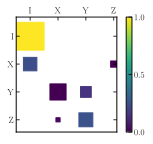

In [96]:
fig, ax = hinton_plot.hinton(np.around(ptm_ideal.real, 5))
plt.show()
fig.savefig(f"{x}_ptm_ideal_level_{level}_idx_0_qubit_0.pdf")

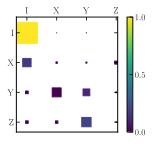

In [97]:
fig, ax = hinton_plot.hinton(np.around(ptm_noisy.real, 5))
plt.show()
fig.savefig(f"{x}_ptm_noisy_level_{level}_idx_0_qubit_0.pdf")

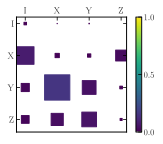

In [98]:
fig, ax = hinton_plot.hinton(np.around(diff.real, 5))
plt.show()
fig.savefig(f"{x}_ptm_diff_level_{level}_idx_0_qubit_0.pdf")

## CV
- level 1: 0.03613190000210018
- level 2: 0.056813367080164295
- level 3: 0.07243760091144862
- level 4: 0.08866221900120194
- level 5: 0.1283358787167303
- level 6: 0.18767684557803613

## DV
- level 1: 0.05685910683717695
- level 2: 0.08341549433250686
- level 3: 0.10040400576650965
- level 4: 0.11536788398072402
- level 5: 0.13698309111196624
- level 6: 0.19407837031274142

In [19]:
cv_norm = [0.03613190000210018, 0.056813367080164295, 0.07243760091144862, 0.08866221900120194, 0.1283358787167303, 0.18767684557803613]
dv_norm = [0.05685910683717695, 0.08341549433250686, 0.10040400576650965, 0.11536788398072402, 0.13698309111196624, 0.19407837031274142]

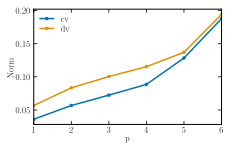

In [20]:
plt.plot(range(1,7), cv_norm, '.-', label='cv')
plt.plot(range(1,7), dv_norm, '.-', label='dv')
plt.xlabel('p')
plt.ylabel('Norm')
plt.legend()